In [8]:

# Stochastic Gradient Descent (SGD)
# Batch Gradient Descent (BGD)
# Mini-Batch Gradient Descent (MBGD)



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [11]:
from sklearn import preprocessing

In [37]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis= 'columns'))
scaled_X
scaled_X.shape
print(scaled_X)

[[0.         0.         0.54545455]
 [0.26666667 0.33333333 0.31818182]
 [0.4        0.         0.45454545]
 [0.66666667 0.         1.        ]
 [0.93333333 0.66666667 0.        ]
 [1.         1.         0.        ]]


In [36]:
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y
scaled_Y.shape
print(scaled_Y)

[[0.        ]
 [0.05769231]
 [0.23076923]
 [0.17307692]
 [0.80769231]
 [1.        ]]


In [41]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        y_pred = np.dot(weights, scaled_X.T) + bias
        
        dw = (1/total_samples) * np.dot((y_pred - scaled_Y), scaled_X)
        db = (1/total_samples) * np.sum(y_pred - scaled_Y)
        
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        cost = np.mean(np.square(y_true - y_pred))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
    return weights, bias, cost_list, epochs_list   
            
weights , bias, cost_list, epochs_list = batch_gradient_descent(scaled_X, scaled_Y, epochs=500, learning_rate=0.01)  
weights , bias         
    

(array([[0.16210657, 0.47325943, 0.68038184],
        [0.2027576 , 0.49779955, 0.72595746],
        [0.32471071, 0.57141991, 0.86268434],
        [0.28405967, 0.54687979, 0.81710872],
        [0.73122106, 0.81682111, 1.3184406 ],
        [0.86672451, 0.89862151, 1.47035936]]),
 np.float64(-0.45334048651803865))

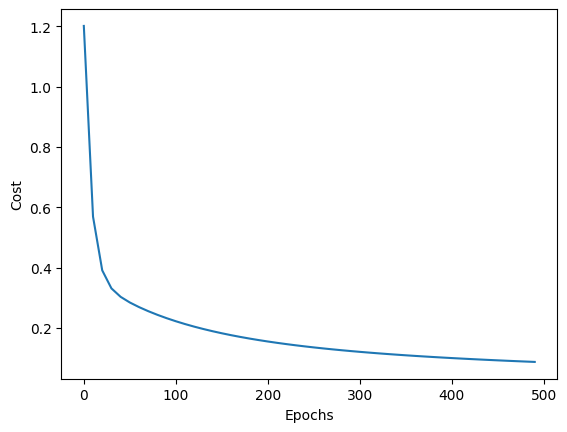

In [32]:
# plot the cost vs epochs
plt.plot(epochs_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()